In [1]:
import numpy as np
import matplotlib.pyplot as plot

class LinearRegression:
    def __init__(self, epochs: int, learning_rate, verbose):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.verbose = verbose

    def train(self, x, xbar, y, N):
        self.x = x
        self.xbar = xbar
        self.y = y
        self.N = N

        self.costs = np.zeros((self.epochs, 1))
        self.w = np.array([0., 0.]).reshape(-1, 1)

        for i in range(self.epochs):
            error = xbar @ self.w - y

            self.w[0] -= self.learning_rate * (np.sum(error) / N)
            self.w[1] -= self.learning_rate * (np.sum(error * x) / N)

            self.costs[i] = 0.5 * np.mean(error * error)
            if not (i % self.verbose): 
                print('Iteration ', i, ', cost: ', self.costs[i], end="\n")

        return self.w, self.costs
    
    def show_result(self):
        # Create subplots (2 rows, 1 column)
        _, axes = plot.subplots(2, 1, figsize=(6, 8))

        # First plot: Cost function over epochs
        axes[0].plot(np.arange(0, 1000), self.costs, 'y')
        axes[0].set_title("Cost Graph")
        axes[0].set_xlabel("Epoch")
        axes[0].set_ylabel("Cost")

        # Second plot: Linear regression fit
        x_space = np.linspace(np.min(self.x), np.max(self.x), 100).reshape(-1, 1)
        y_space = np.hstack((np.ones((x_space.shape[0], 1)), x_space)) @ self.w

        axes[1].plot(self.x, self.y, "bo", label="Training Data")
        axes[1].plot(x_space, y_space, "r", label="Regression Line")
        axes[1].set_title("Regression line")
        axes[1].set_xlabel("x")
        axes[1].set_ylabel("y")
        axes[1].legend()

        # Show the plots
        manager = plot.get_current_fig_manager()
        manager.resize(700, 700)
        plot.tight_layout()
        plot.show()

Iteration  0 , cost:  [1667.67732421]
Iteration  10 , cost:  [1364.72016289]
Iteration  20 , cost:  [1116.92939884]
Iteration  30 , cost:  [914.25961386]
Iteration  40 , cost:  [748.49459068]
Iteration  50 , cost:  [612.91422821]
Iteration  60 , cost:  [502.02210915]
Iteration  70 , cost:  [411.32267564]
Iteration  80 , cost:  [337.13897973]
Iteration  90 , cost:  [276.4636202]
Iteration  100 , cost:  [226.83682269]
Iteration  110 , cost:  [186.24672072]
Iteration  120 , cost:  [153.04779472]
Iteration  130 , cost:  [125.89416283]
Iteration  140 , cost:  [103.68501892]
Iteration  150 , cost:  [85.52000604]
Iteration  160 , cost:  [70.66271598]
Iteration  170 , cost:  [58.51083537]
Iteration  180 , cost:  [48.57172791]
Iteration  190 , cost:  [40.44246297]
Iteration  200 , cost:  [33.79348078]
Iteration  210 , cost:  [28.35523211]
Iteration  220 , cost:  [23.9072508]
Iteration  230 , cost:  [20.26921603]
Iteration  240 , cost:  [17.29364215]
Iteration  250 , cost:  [14.85989963]
Iterati

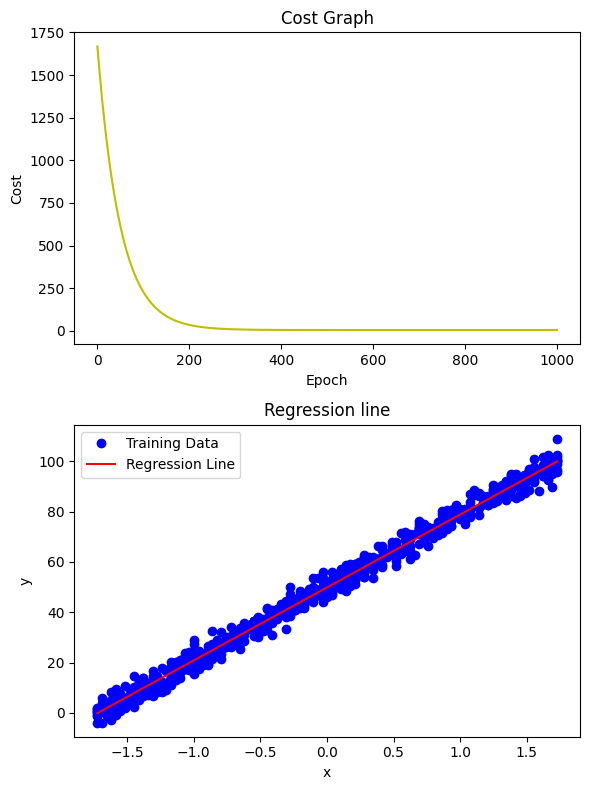

In [2]:
import pandas as pd
import numpy as np
from LinearRegression import LinearRegression

def data_standardize(data):
    x = data[:, 0].reshape(-1, 1)
    x_mean = np.mean(x, axis=0)
    x_std = np.std(x, axis=0)
    x = (x - x_mean) / x_std
    N = data.shape[0]
    xbar = np.hstack((np.ones((N, 1)), x))
    y = data[:, 1].reshape(-1, 1)

    return x, xbar, y, N

if __name__ == "__main__":
    # Load and preprocess data
    data = pd.read_csv("datasets/linear_reg/train.csv").dropna().values
    x, xbar, y, N = data_standardize(data)

    # Train the model
    linear_regressor = LinearRegression(
        epochs=1000,
        learning_rate=0.01,
        verbose=10,
    )

    w, costs = linear_regressor.train(x, xbar, y, N)

    # Show the costs graph and regression line
    linear_regressor.show_result()
    